In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
from keras.layers import Flatten, Dense
from keras.applications import InceptionV3
from glob import glob
from keras.models import Model

In [15]:
inp_shape= [224, 224]
batch_size= 32

In [16]:
inc_v3= InceptionV3(input_shape= inp_shape+[3,] , weights='imagenet', include_top=False)
for layers in inc_v3.layers:
    layers.trainable=False

In [17]:
folders= glob('C:/Users/DIBYOJIT/Downloads/Brain Tumour Detection/*')
len(folders)

3

In [18]:
x= Flatten()(inc_v3.output)

In [19]:
prediction= Dense(len(folders), activation='softmax')(x)

Inc_V3= Model(inputs= inc_v3.input, outputs= prediction)

In [20]:
Inc_V3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [21]:
Inc_V3.compile(
    optimizer= 'adam',
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [22]:
tr_path= r'C:\Users\DIBYOJIT\Downloads\Brain Tumour Detection\train'
test_path= r'C:\Users\DIBYOJIT\Downloads\Brain Tumour Detection\test'
val_path= r'C:\Users\DIBYOJIT\Downloads\Brain Tumour Detection\val'

In [23]:
train_gen= tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True
)


train_datagen= train_gen.flow_from_directory(
   tr_path,
   target_size= (224, 224),
   batch_size= batch_size,
)

val_gen= tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True
)
val_datagen= val_gen.flow_from_directory(
   val_path,
   target_size= (224, 224),
   batch_size= batch_size,
)
test_gen= tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

test_datagen= test_gen.flow_from_directory(
   test_path,
   target_size= (224, 224),
   batch_size= batch_size,
)

Found 3064 images belonging to 3 classes.
Found 3064 images belonging to 3 classes.
Found 3064 images belonging to 3 classes.


In [24]:
train_datagen.next()

(array([[[[0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177],
          ...,
          [0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177]],
 
         [[0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177],
          ...,
          [0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177]],
 
         [[0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177],
          ...,
          [0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177],
          [0.26666668, 0.00392157, 0.32941177]],
 
         ...,
 
         [[0.26666668, 0.00392157, 0.32941177],
          [0.26666

In [25]:
data= tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/DIBYOJIT/Downloads/BTD',
    shuffle=True,
    image_size=inp_shape,
    batch_size=batch_size
)

Found 3064 files belonging to 3 classes.


In [26]:
class_names= data.class_names
class_names

['1', '2', '3']

In [27]:
for image_batch, label_batch in data.take(2):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[0 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 0 0 1 2 1 1 1 1 1 2 1 1 1 0]
(32, 224, 224, 3)
[1 1 1 1 2 2 0 0 1 1 1 1 1 1 1 1 2 1 1 1 1 2 0 0 1 0 1 0 1 1 0 0]


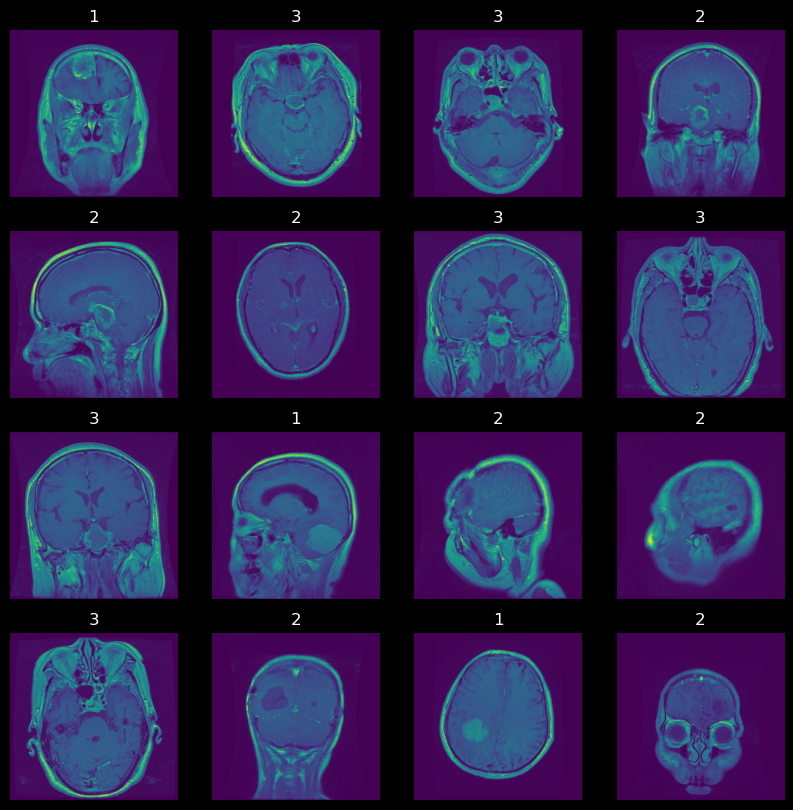

In [29]:
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
for image_batch, label_batch in data.take(1):
    for i in range(16):
        ax= plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("int"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [33]:
inception_v3= Inc_V3.fit(train_datagen,
                                  validation_data= val_datagen,
                                  epochs=5, verbose=1)

Epoch 1/5
96/96 [==============================] - 295s 3s/step - loss: 3.3520 - accuracy: 0.6697 - val_loss: 1.7431 - val_accuracy: 0.7255
Epoch 2/5
96/96 [==============================] - 256s 3s/step - loss: 1.2844 - accuracy: 0.7810 - val_loss: 1.2638 - val_accuracy: 0.7487
Epoch 3/5
96/96 [==============================] - 256s 3s/step - loss: 1.2333 - accuracy: 0.7777 - val_loss: 0.9059 - val_accuracy: 0.8427
Epoch 4/5
96/96 [==============================] - 254s 3s/step - loss: 1.1904 - accuracy: 0.8068 - val_loss: 1.0938 - val_accuracy: 0.8319
Epoch 5/5
96/96 [==============================] - 258s 3s/step - loss: 1.1140 - accuracy: 0.8264 - val_loss: 0.8530 - val_accuracy: 0.8398


In [36]:
img_predict= Inc_V3.predict(test_datagen)
img_predict

96/96 [==============================] - 124s 1s/step


array([[2.4003799e-03, 9.9759966e-01, 2.2141651e-09],
       [4.0917906e-01, 3.2720214e-05, 5.9078825e-01],
       [3.3393942e-02, 9.6660608e-01, 1.7868510e-13],
       ...,
       [5.8995064e-02, 8.7042630e-01, 7.0578732e-02],
       [7.8949049e-11, 1.1706506e-09, 1.0000000e+00],
       [3.7548343e-05, 9.9996185e-01, 5.4967614e-07]], dtype=float32)

In [37]:
for image_batch, label_batch in data.take(1):
    batch_prediction= Inc_V3.predict(image_batch)
    print(batch_prediction[0])

1/1 [==============================] - 2s 2s/step
[3.244851e-25 0.000000e+00 1.000000e+00]


first image to predict
first's image actual label: 3
1/1 [==============================] - 1s 987ms/step
[1.5590918e-07 1.0029668e-33 9.9999988e-01]
2
predicted label : 3


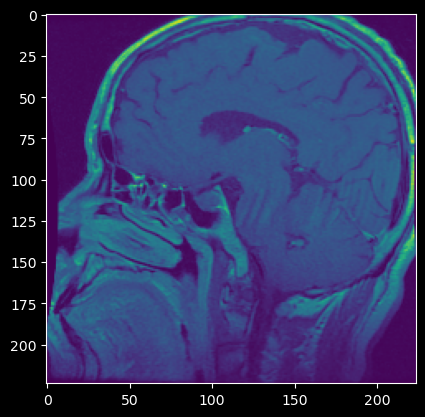

In [38]:
for image_batch, label_batch in data.take(1):
    first_image= image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first's image actual label:", class_names[first_label])
    batch_prediction= Inc_V3.predict(image_batch)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print("predicted label :", class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model, img):
    for i in range(9):
        img_array= tf.keras.preprocessing.image.img_to_array(image[i].numpy())
        img_array= np.expand_dims(img_array, 0)
        predictions= Inc_V3.predict(img_array)
        predicted_class= class_names[np.argmax(predictions[0])]
        return predicted_class

1/1 [==============================] - 0s 74ms/step


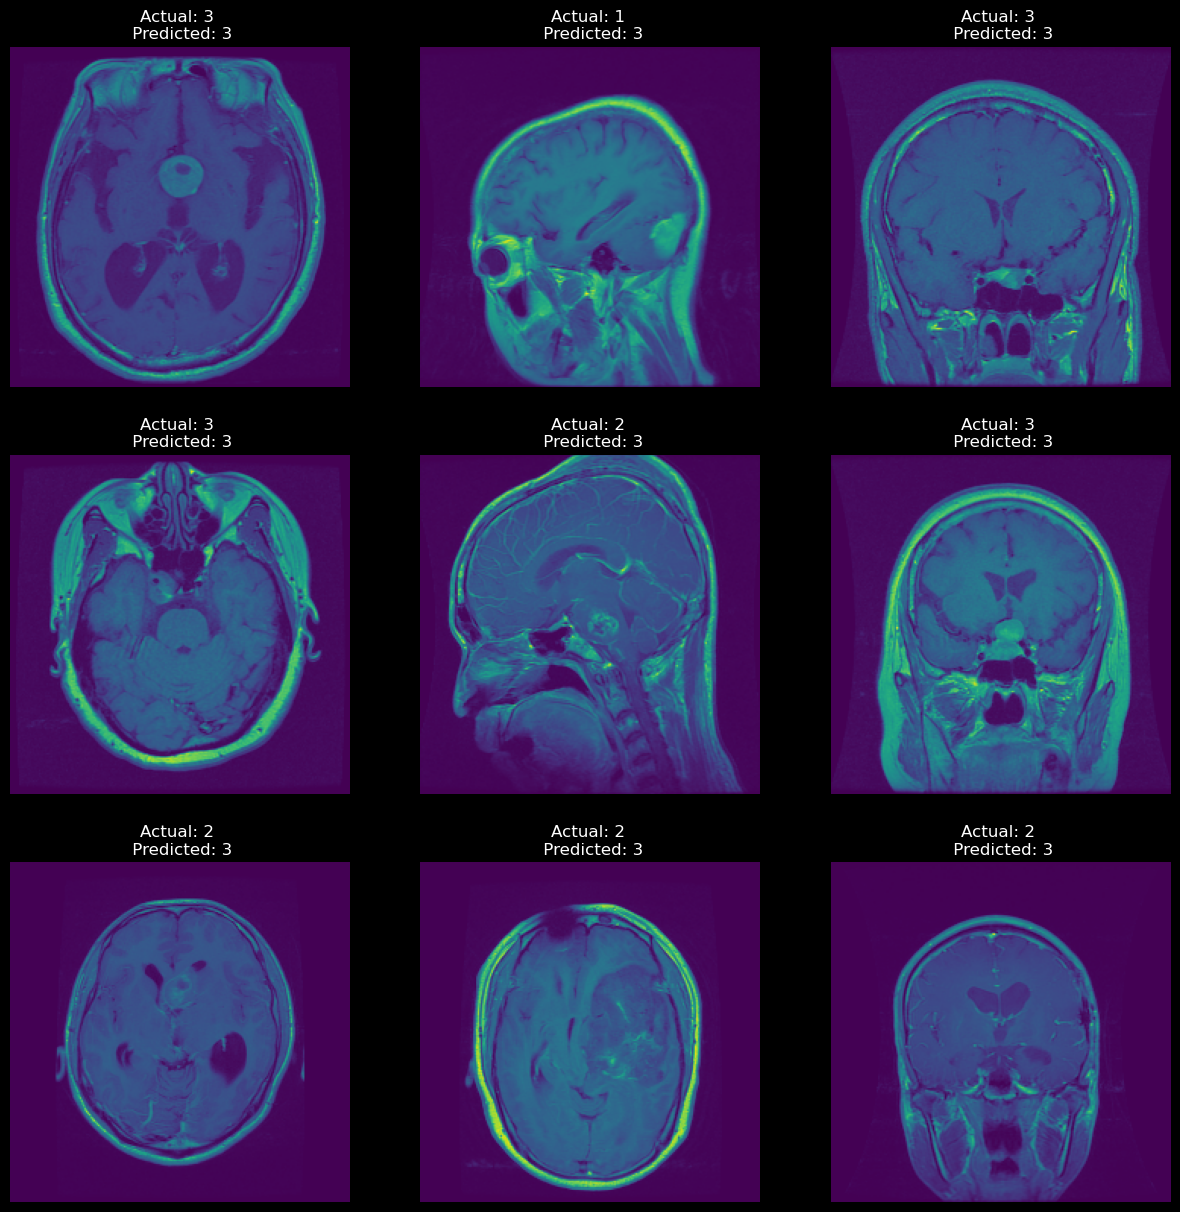

In [41]:
plt.figure(figsize=(15,15))
for image, label in data.take(2):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        predicted_class= predict(Inc_V3, image[i].numpy())
        actual_class= class_names[label[i]]
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class}")
        plt.axis("off")

In [43]:
acc= inception_v3.history['accuracy']
val_acc= inception_v3.history['val_accuracy']
loss= inception_v3.history['loss']
val_loss= inception_v3.history['val_loss']

In [48]:
acc

[0.6697127819061279,
 0.7810052037239075,
 0.7777414917945862,
 0.8067885041236877,
 0.8263707756996155]

Text(0.5, 1.0, 'Training and Validation loss')

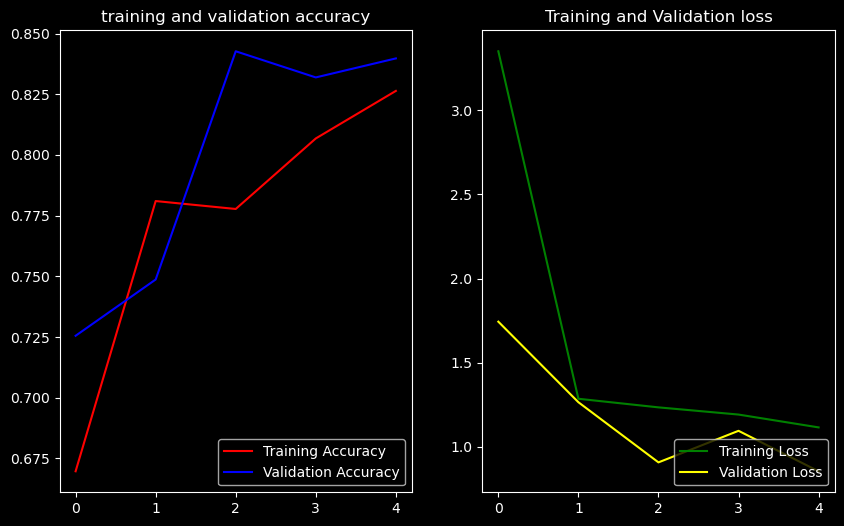

In [49]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(range(5), acc, label= "Training Accuracy", color='red')
plt.plot(range(5), val_acc, label= "Validation Accuracy", color='blue')
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(5), loss, label= "Training Loss", color='green')
plt.plot(range(5), val_loss, label= "Validation Loss", color='yellow')
plt.legend(loc="lower right")
plt.title("Training and Validation loss")